In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rutas import *

%matplotlib inline

In [2]:
#entrenamiento = pd.read_csv(RUTA_SET_ENTRENAMIENTO)
entrenamiento = pd.read_csv('/home/luciano/orga-datos/v3/set_test.csv')#RUTA_DATOS_PROCESADOS + 'no_postulados.csv')
entrenamiento.head()

,idaviso,idpostulante,sepostulo
0,1112372487,8BXzvx,1
1,1112423597,ek46wJ9,1
2,1112318440,Nz04eZD,1
3,1112280950,LNKXOWb,1
4,1112108043,eYZJqr,1


In [3]:
vistas = pd.read_csv(RUTA_VISTAS)
vistas = vistas[['idAviso','idpostulante']]
vistas.head()

,idAviso,idpostulante
0,1111780242,YjVJQ6Z
1,1112263876,BmVpYoR
2,1112327963,wVkBzZd
3,1112318643,OqmP9pv
4,1111903673,DrpbXDP


In [4]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754298 entries, 0 to 16754297
Data columns (total 2 columns):
idAviso         int64
idpostulante    object
dtypes: int64(1), object(1)
memory usage: 255.7+ MB


In [5]:
cant_vistas = vistas.groupby(['idAviso', 'idpostulante']).size().reset_index(name='cant_vistas')
cant_vistas.head()

,idAviso,idpostulante,cant_vistas
0,18,BolNL,2
1,48375,RwVdKR,1
2,169730,1KjXB,2
3,169730,2AKzxa,2
4,169730,6LJ64,1


In [6]:
entrenamiento = pd.merge(entrenamiento, cant_vistas, left_on=['idaviso','idpostulante'], right_on = ['idAviso', 'idpostulante'], how='left')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,idAviso,cant_vistas
0,1112372487,8BXzvx,1,1.112372e+09,4.0
1,1112423597,ek46wJ9,1,1.112424e+09,6.0
2,1112318440,Nz04eZD,1,NaN,NaN
3,1112280950,LNKXOWb,1,1.112281e+09,1.0
4,1112108043,eYZJqr,1,NaN,NaN


In [7]:
entrenamiento = entrenamiento.drop(axis=1, labels=['idAviso'])
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas
0,1112372487,8BXzvx,1,4.0
1,1112423597,ek46wJ9,1,6.0
2,1112318440,Nz04eZD,1,0.0
3,1112280950,LNKXOWb,1,1.0
4,1112108043,eYZJqr,1,0.0


In [8]:
empresa_area = pd.read_csv(RUTA_AVISOS_DETALLE, usecols=['idaviso','denominacion_empresa','nombre_area'])
empresa_area.head()

,idaviso,nombre_area,denominacion_empresa
0,1001284385,Otros,Establecimiento Las Marías
1,1110092955,Producción,RANDSTAD
2,1110092958,Mantenimiento,RANDSTAD
3,1110391074,Ingeniería Industrial,Coca Cola Andina Argentina
4,1110669632,Mantenimiento,PLUMARI S A


In [9]:
vistas = pd.merge(vistas, empresa_area, left_on='idAviso', right_on='idaviso')
vistas.head()

,idAviso,idpostulante,idaviso,nombre_area,denominacion_empresa
0,1111780242,YjVJQ6Z,1111780242,Programación de producción,dm
1,1111780242,dYjRpMD,1111780242,Programación de producción,dm
2,1111780242,wVopPXl,1111780242,Programación de producción,dm
3,1111780242,wVopPXl,1111780242,Programación de producción,dm
4,1111780242,wVoOPoL,1111780242,Programación de producción,dm


In [10]:
vistas = vistas.drop(labels='idAviso', axis=1)

In [11]:
cant_vistas_empresa = (vistas[['idpostulante', 'denominacion_empresa']]).groupby(['idpostulante', 'denominacion_empresa']).size().reset_index(name='cant_vistas_empresa')
cant_vistas_empresa.head()

,idpostulante,denominacion_empresa,cant_vistas_empresa
0,0005E,Baufest,2
1,00Lkv,Whirlpool,2
2,00dMd,Whirlpool,4
3,01QAq,BEYA,1
4,021OM,Whirlpool,5


In [12]:
empresas = empresa_area[['idaviso','denominacion_empresa']]
entrenamiento = pd.merge(entrenamiento,empresas, on='idaviso')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa
0,1112372487,8BXzvx,1,4.0,Walmart Argentina S.R.L.
1,1112372487,5mqqkrw,1,0.0,Walmart Argentina S.R.L.
2,1112423597,ek46wJ9,1,6.0,COTO cicsa
3,1112423597,4rea2vR,1,4.0,COTO cicsa
4,1112423597,PmL1j6J,1,6.0,COTO cicsa


In [13]:
entrenamiento = pd.merge(entrenamiento, cant_vistas_empresa, on=['idpostulante','denominacion_empresa'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa
0,1112372487,8BXzvx,1,4.0,Walmart Argentina S.R.L.,4.0
1,1112372487,5mqqkrw,1,0.0,Walmart Argentina S.R.L.,0.0
2,1112423597,ek46wJ9,1,6.0,COTO cicsa,6.0
3,1112423597,4rea2vR,1,4.0,COTO cicsa,4.0
4,1112423597,PmL1j6J,1,6.0,COTO cicsa,10.0


In [14]:
cant_vistas_area = (vistas[['idpostulante', 'nombre_area']]).groupby(['idpostulante', 'nombre_area']).size().reset_index(name='cant_vistas_area')
cant_vistas_area.head()

,idpostulante,nombre_area,cant_vistas_area
0,0005E,Tecnologia / Sistemas,2
1,00Lkv,Comercio Exterior,2
2,00dMd,Comercio Exterior,4
3,01QAq,Contabilidad,1
4,021OM,Comercio Exterior,5


In [15]:
areas = empresa_area[['idaviso','nombre_area']]
entrenamiento = pd.merge(entrenamiento, areas, on='idaviso')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa,nombre_area
0,1112372487,8BXzvx,1,4.0,Walmart Argentina S.R.L.,4.0,Administración
1,1112372487,5mqqkrw,1,0.0,Walmart Argentina S.R.L.,0.0,Administración
2,1112423597,ek46wJ9,1,6.0,COTO cicsa,6.0,Comercial
3,1112423597,4rea2vR,1,4.0,COTO cicsa,4.0,Comercial
4,1112423597,PmL1j6J,1,6.0,COTO cicsa,10.0,Comercial


In [16]:
entrenamiento = pd.merge(entrenamiento, cant_vistas_area, on=['idpostulante','nombre_area'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,denominacion_empresa,cant_vistas_empresa,nombre_area,cant_vistas_area
0,1112372487,8BXzvx,1,4.0,Walmart Argentina S.R.L.,4.0,Administración,9.0
1,1112372487,5mqqkrw,1,0.0,Walmart Argentina S.R.L.,0.0,Administración,3.0
2,1112423597,ek46wJ9,1,6.0,COTO cicsa,6.0,Comercial,13.0
3,1112423597,4rea2vR,1,4.0,COTO cicsa,4.0,Comercial,21.0
4,1112423597,PmL1j6J,1,6.0,COTO cicsa,10.0,Comercial,18.0


In [17]:
postulaciones = pd.read_csv(RUTA_SET_ENTRENAMIENTO) # El set tiene filtrado que avisos se vieron y que avisos se postularon.
postulaciones = postulaciones[postulaciones['sepostulo'] == 1]
postulaciones = postulaciones.drop(labels='sepostulo', axis = 1)
postulaciones.head()

,idaviso,idpostulante
0,1112310051,8WGL0l
1,1111503098,zv6W8Y8
2,1112406885,jk5wR2B
3,1112451857,owa0kJe
5,1112200601,BmDGDGz


In [18]:
postulaciones = pd.merge(postulaciones, empresa_area, on='idaviso')
postulaciones.head()

,idaviso,idpostulante,nombre_area,denominacion_empresa
0,1112310051,8WGL0l,Administración,Excelencia Laboral S.A.
1,1112310051,8wP3KR,Administración,Excelencia Laboral S.A.
2,1112310051,Dr6A0rZ,Administración,Excelencia Laboral S.A.
3,1112310051,MVdbKve,Administración,Excelencia Laboral S.A.
4,1112310051,MVPdOoN,Administración,Excelencia Laboral S.A.


In [19]:
cant_postulaciones_empresa = (postulaciones[['idpostulante', 'denominacion_empresa']]).groupby(['idpostulante', 'denominacion_empresa']).size().reset_index(name='cant_postulaciones_empresa')
cant_postulaciones_empresa.head()

,idpostulante,denominacion_empresa,cant_postulaciones_empresa
0,0z5Dmrd,Importante Empresa,1
1,0z5Dmrd,PilarArtigas,1
2,0z5JW1r,Adecco -Región GBA SUR,1
3,0z5JW1r,CK Recursos Humanos,1
4,0z5JW1r,Complement Group (holding),1


In [20]:
entrenamiento = pd.merge(entrenamiento, cant_postulaciones_empresa, on=['idpostulante','denominacion_empresa'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento = entrenamiento.drop(labels='denominacion_empresa',axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,nombre_area,cant_vistas_area,cant_postulaciones_empresa
0,1112372487,8BXzvx,1,4.0,4.0,Administración,9.0,1.0
1,1112372487,5mqqkrw,1,0.0,0.0,Administración,3.0,1.0
2,1112423597,ek46wJ9,1,6.0,6.0,Comercial,13.0,2.0
3,1112423597,4rea2vR,1,4.0,4.0,Comercial,21.0,1.0
4,1112423597,PmL1j6J,1,6.0,10.0,Comercial,18.0,2.0


In [21]:
cant_postulaciones_area = (postulaciones[['idpostulante', 'nombre_area']]).groupby(['idpostulante', 'nombre_area']).size().reset_index(name='cant_postulaciones_area')
cant_postulaciones_area.head()

,idpostulante,nombre_area,cant_postulaciones_area
0,0z5Dmrd,Recursos Humanos,2
1,0z5JW1r,Almacén / Depósito / Expedición,1
2,0z5JW1r,Comercial,1
3,0z5JW1r,Desarrollo de Negocios,1
4,0z5JW1r,Gastronomia,1


In [22]:
entrenamiento = pd.merge(entrenamiento, cant_postulaciones_area, on=['idpostulante','nombre_area'], how='left')
entrenamiento = entrenamiento.fillna(0, axis=1)
entrenamiento = entrenamiento.drop(labels='nombre_area',axis=1)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112372487,8BXzvx,1,4.0,4.0,9.0,1.0,2.0
1,1112372487,5mqqkrw,1,0.0,0.0,3.0,1.0,11.0
2,1112423597,ek46wJ9,1,6.0,6.0,13.0,2.0,5.0
3,1112423597,4rea2vR,1,4.0,4.0,21.0,1.0,7.0
4,1112423597,PmL1j6J,1,6.0,10.0,18.0,2.0,2.0


In [23]:
entrenamiento['cant_vistas'] = entrenamiento['cant_vistas'].astype('int64')
entrenamiento['cant_vistas_empresa'] = entrenamiento['cant_vistas_empresa'].astype('int64')
entrenamiento['cant_vistas_area'] = entrenamiento['cant_vistas_area'].astype('int64')
entrenamiento['cant_postulaciones_empresa'] = entrenamiento['cant_postulaciones_empresa'].astype('int64')
entrenamiento['cant_postulaciones_area'] = entrenamiento['cant_postulaciones_area'].astype('int64')
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112372487,8BXzvx,1,4,4,9,1,2
1,1112372487,5mqqkrw,1,0,0,3,1,11
2,1112423597,ek46wJ9,1,6,6,13,2,5
3,1112423597,4rea2vR,1,4,4,21,1,7
4,1112423597,PmL1j6J,1,6,10,18,2,2


In [24]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
idaviso                       100000 non-null int64
idpostulante                  100000 non-null object
sepostulo                     100000 non-null int64
cant_vistas                   100000 non-null int64
cant_vistas_empresa           100000 non-null int64
cant_vistas_area              100000 non-null int64
cant_postulaciones_empresa    100000 non-null int64
cant_postulaciones_area       100000 non-null int64
dtypes: int64(7), object(1)
memory usage: 6.9+ MB


In [25]:
#entrenamiento.to_csv(RUTA_DATOS_PROCESADOS + 'entrenamiento.csv', index=False)
#entrenamiento.to_csv(RUTA_DATOS_PROCESADOS + 'kaggle.csv', index=False)
entrenamiento.to_csv('/home/luciano/orga-datos/v3/set_test_prepro.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
from rutas import *

In [2]:
no_postulados = pd.read_csv(RUTA_SET_NO_POSTULADOS)
postulados = pd.read_csv(RUTA_SET_ENTRENAMIENTO)
no_postulados = pd.merge(no_postulados,postulados, on=['idaviso', 'idpostulante'],how='left')
no_postulados.head()

KeyboardInterrupt: 

In [ ]:
no_postulados = no_postulados[(no_postulados['sepostulo_y'].isna())]
no_postulados.head()

In [ ]:
no_postulados = no_postulados[['idaviso','idpostulante','sepostulo_x']]
no_postulados.head()

In [ ]:
no_postulados = no_postulados.rename({'sepostulo_x':'sepostulo'},axis=1)
no_postulados.head()

In [ ]:
no_postulados.to_csv(RUTA_SET_NO_POSTULADOS)

#### Hasta acá: Generación de datos


#### Desde acá: Uso de resultados cacheados porque soy pobre y no tengo tanta RAM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rutas import *

%matplotlib inline

In [3]:
avisos_detalle = pd.read_csv(RUTA_DATOS_PROCESADOS + 'avisos_detalle.csv')
entrenamiento = pd.read_csv(RUTA_DATOS_PROCESADOS + 'entrenamiento.csv', nrows = 1000000)
#entrenamiento = pd.read_csv('/home/luciano/orga-datos/v3/set_test_prepro.csv')
no_postulados = pd.read_csv(RUTA_SET_NO_POSTULADOS, nrows = 1000000)
postulantes = pd.read_csv(RUTA_VECTOR_POSTULANTES)

In [4]:
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112310051,8WGL0l,1,0,3,7,1,3
1,1112310051,8wP3KR,1,0,0,0,3,1
2,1112310051,Dr6A0rZ,1,0,0,0,4,12
3,1112310051,MVdbKve,1,0,0,1,7,4
4,1112310051,MVPdOoN,1,0,0,0,3,23


In [5]:
no_postulados.head()

,Unnamed: 0,idaviso,idpostulante,sepostulo
0,0,1112425633,bOjBlEb,0
1,1,1112423627,6p4e8j,0
2,2,1112414508,mzVRkZO,0
3,3,1112028771,KBab1Qd,0
4,4,1112369690,6wqPjj,0


In [6]:
no_postulados = no_postulados.drop(labels='Unnamed: 0',axis=1)
no_postulados.head()

,idaviso,idpostulante,sepostulo
0,1112425633,bOjBlEb,0
1,1112423627,6p4e8j,0
2,1112414508,mzVRkZO,0
3,1112028771,KBab1Qd,0
4,1112369690,6wqPjj,0


In [7]:
entrenamiento = pd.concat([entrenamiento,no_postulados], sort=False)
entrenamiento.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112310051,8WGL0l,1,0.0,3.0,7.0,1.0,3.0
1,1112310051,8wP3KR,1,0.0,0.0,0.0,3.0,1.0
2,1112310051,Dr6A0rZ,1,0.0,0.0,0.0,4.0,12.0
3,1112310051,MVdbKve,1,0.0,0.0,1.0,7.0,4.0
4,1112310051,MVPdOoN,1,0.0,0.0,0.0,3.0,23.0


In [8]:
entrenamiento.shape

(2000000, 8)

In [9]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 999999
Data columns (total 8 columns):
idaviso                       int64
idpostulante                  object
sepostulo                     int64
cant_vistas                   float64
cant_vistas_empresa           float64
cant_vistas_area              float64
cant_postulaciones_empresa    float64
cant_postulaciones_area       float64
dtypes: float64(5), int64(2), object(1)
memory usage: 137.3+ MB


In [10]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=20, max_features=100, min_samples_split=10, criterion='entropy', n_jobs=-1, verbose=1)

In [11]:
MAX_SAMPLE_SIZE = 500000
TRAINING_SIZE   = int(MAX_SAMPLE_SIZE * 0.9)
#TRAINING_SIZE = int(len(entrenamiento) * 0.9)

entrenamiento = entrenamiento.sample(n=MAX_SAMPLE_SIZE)
entrenamiento = pd.merge(entrenamiento, postulantes, on='idpostulante', how='inner')
entrenamiento = pd.merge(entrenamiento, avisos_detalle, on='idaviso', how='inner')

In [12]:
entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante'], inplace=True)

In [13]:
entrenamiento['sexo'] = entrenamiento['sexo'].fillna(0)
entrenamiento['edad'] = entrenamiento['edad'].fillna(30)
entrenamiento['cant_postulaciones_area'] = entrenamiento['cant_postulaciones_area'].fillna(0)
entrenamiento['cant_postulaciones_empresa'] = entrenamiento['cant_postulaciones_empresa'].fillna(0)
entrenamiento['cant_vistas'] = entrenamiento['cant_vistas'].fillna(0)
entrenamiento['cant_vistas_area'] = entrenamiento['cant_vistas_area'].fillna(0)
entrenamiento['cant_vistas_empresa'] = entrenamiento['cant_vistas_empresa'].fillna(0)

In [14]:
training = entrenamiento[:TRAINING_SIZE]
test = entrenamiento[TRAINING_SIZE:]

training.head()

,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,sexo,edad,nivel_educativo,dist_a_salta,...,nombre_area_Transporte,nombre_area_Turismo,nombre_area_Urbanismo,nombre_area_Venta de Seguros,nombre_area_Ventas,nombre_area_Ventas Internacionales/Exportación,nombre_area_Veterinaria,prom_sexo,prom_edad,prom_nivel_educativo
0,0,0.0,0.0,0.0,0.0,0.0,-1,41,4.0,1467,...,0,0,0,0,1,0,0,0.526316,29.168421,2.078947
1,0,0.0,0.0,0.0,0.0,0.0,-1,24,2.0,1467,...,0,0,0,0,1,0,0,0.526316,29.168421,2.078947
2,0,0.0,0.0,0.0,0.0,0.0,-1,20,2.0,1467,...,0,0,0,0,1,0,0,0.526316,29.168421,2.078947
3,0,0.0,0.0,0.0,0.0,0.0,1,26,4.0,1467,...,0,0,0,0,1,0,0,0.526316,29.168421,2.078947
4,0,0.0,0.0,0.0,0.0,0.0,1,25,2.0,1467,...,0,0,0,0,1,0,0,0.526316,29.168421,2.078947


In [15]:
print((test['cant_vistas'] != 0).sum())
print((test['cant_vistas_empresa'] != 0).sum())
print((test['cant_vistas_area'] != 0).sum())
print((test['cant_postulaciones_empresa'] != 0).sum())
print((test['cant_postulaciones_area'] != 0).sum())

In [16]:
len(test)

42599

In [18]:
y = training['sepostulo']
training = training.drop(axis=1, labels=['sepostulo'])

In [19]:
training['nivel_educativo'] = training['nivel_educativo'].fillna(2)

In [20]:
for c in training.columns:
    training[c] = training[c].fillna(0)

In [21]:
rdf.fit(training, y)

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [22]:
y = test['sepostulo']
test = test.drop(axis=1, labels=['sepostulo'])

In [23]:
test['nivel_educativo'] = test['nivel_educativo'].fillna(2)
for c in training.columns:
    training[c] = training[c].fillna(0)

In [24]:
rdf.score(test, y)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


0.9999295758116388

In [25]:
test_v3 = pd.read_csv('/home/luciano/orga-datos/v3/set_test_prepro.csv')
test_v3.head()

,idaviso,idpostulante,sepostulo,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,1112372487,8BXzvx,1,4,4,9,1,2
1,1112372487,5mqqkrw,1,0,0,3,1,11
2,1112423597,ek46wJ9,1,6,6,13,2,5
3,1112423597,4rea2vR,1,4,4,21,1,7
4,1112423597,PmL1j6J,1,6,10,18,2,2


In [72]:
test_o = pd.read_csv(RUTA_DATOS_PROCESADOS + 'kaggle.csv')
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,0,739260,6M9ZQR,0,0,4,0,0
1,1,739260,6v1xdL,0,0,0,0,5
2,2,739260,ezRKm9,0,0,1,0,0
3,3,758580,1Q35ej,0,0,0,0,0
4,4,758580,EAN4J6,0,0,0,0,0


In [33]:
(test_o['cant_vistas_empresa'] != 0).sum()

37570

In [28]:
#test_o = test_o.drop(axis=1, labels=['cant_vistas', 'cant_vistas_empresa', 'cant_vistas_area','cant_postulaciones_empresa', 'cant_postulaciones_area'])
#test_o = test_o.drop(axis=1, labels=['cant_vistas'])
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,0,739260,6M9ZQR,0,0,4,0,0
1,1,739260,6v1xdL,0,0,0,0,5
2,2,739260,ezRKm9,0,0,1,0,0
3,3,758580,1Q35ej,0,0,0,0,0
4,4,758580,EAN4J6,0,0,0,0,0


In [26]:
test = pd.merge(test_v3, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['idaviso', 'idpostulante'])
test['sexo'] = test['sexo'].fillna(0)
test['prom_sexo'] = test['prom_sexo'].fillna(0)
test['edad'] = test['edad'].fillna(30)
test['prom_edad'] = test['prom_edad'].fillna(30)
test['nivel_educativo'] = test['nivel_educativo'].fillna(2)
test[test['cant_postulaciones_area'].isna()] = 0
test[test['cant_postulaciones_empresa'].isna()] = 0
test[test['cant_vistas'].isna()] = 0
test[test['cant_vistas_area'].isna()] = 0
test[test['cant_vistas_empresa'].isna()] = 0
test[test['prom_nivel_educativo'].isna()] = 0

In [27]:
y_test = test['sepostulo']
test = test.drop(axis=1, labels=['sepostulo'])

In [28]:
ret = rdf.predict_proba(test)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, ret[:, 1])

0.9755141460606059

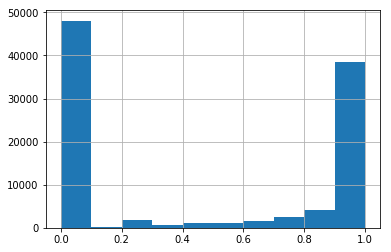

In [31]:
pd.DataFrame(ret[:, 1])[0].hist()

In [36]:
import preprocesar_set.datasets.postulaciones as postulaciones

Cargando postulaciones...OK


In [73]:
test2 = pd.merge(test_o[['idaviso', 'idpostulante']], postulaciones.df, on=['idaviso', 'idpostulante'], how='inner')
test2['num_postulaciones'] = 1
test2 = test2.groupby(['idaviso', 'idpostulante']).agg('count').reset_index()
test2 = pd.merge(test_o[['idaviso', 'idpostulante']], test2, on=['idaviso', 'idpostulante'], how='left')
test2['num_postulaciones'] = test2['num_postulaciones'].fillna(0).astype('int')

In [74]:
test_o_solo_ceros = pd.merge(test2[test2['num_postulaciones'] == 0], test_o, on=['idpostulante', 'idaviso'], how='inner')

In [75]:
test_o_solo_ceros = test_o_solo_ceros.drop(axis=1, labels=['num_postulaciones'])

In [77]:
test = pd.merge(test_o_solo_ceros, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
test['sexo'] = test['sexo'].fillna(0)
test['prom_sexo'] = test['prom_sexo'].fillna(0)
test['edad'] = test['edad'].fillna(30)
test['prom_edad'] = test['prom_edad'].fillna(30)
test['nivel_educativo'] = test['nivel_educativo'].fillna(2)
test[test['cant_postulaciones_area'].isna()] = 0
test[test['cant_postulaciones_empresa'].isna()] = 0
test[test['cant_vistas'].isna()] = 0
test[test['cant_vistas_area'].isna()] = 0
test[test['cant_vistas_empresa'].isna()] = 0
test[test['prom_nivel_educativo'].isna()] = 0
ret = rdf.predict_proba(test)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [78]:
test_o['sepostulo'] = pd.DataFrame(ret)[1]

In [79]:
test_o['sepostulo'] = test_o['sepostulo'].fillna(1)

In [80]:
test_o.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area,sepostulo
0,0,739260,6M9ZQR,0,0,4,0,0,0.0
1,1,739260,6v1xdL,0,0,0,0,5,0.3
2,2,739260,ezRKm9,0,0,1,0,0,0.0
3,3,758580,1Q35ej,0,0,0,0,0,0.0
4,4,758580,EAN4J6,0,0,0,0,0,0.0


In [83]:
len(test_o)

100000

In [84]:
test_o = test_o.drop(axis=1, labels=['idaviso', 'idpostulante','cant_vistas', 'cant_vistas_empresa', 'cant_vistas_area','cant_postulaciones_empresa', 'cant_postulaciones_area'])
test_o.head()

,id,sepostulo
0,0,0.0
1,1,0.3
2,2,0.0
3,3,0.0
4,4,0.0


In [85]:
test_o.to_csv(RUTA_SUBMITS + 'submit-31.csv', index=False)

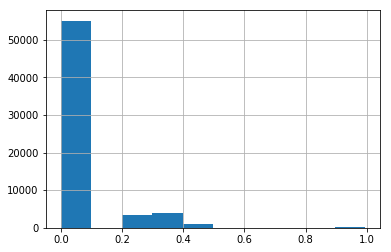

In [87]:
test_o[test_o['sepostulo'] != 1]['sepostulo'].hist()

In [88]:
kaggle = pd.read_csv(RUTA_DATOS_PROCESADOS + 'kaggle.csv')
kaggle.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,0,739260,6M9ZQR,0,0,4,0,0
1,1,739260,6v1xdL,0,0,0,0,5
2,2,739260,ezRKm9,0,0,1,0,0
3,3,758580,1Q35ej,0,0,0,0,0
4,4,758580,EAN4J6,0,0,0,0,0


In [89]:
test = pd.merge(kaggle, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
test['sexo'] = test['sexo'].fillna(0)
test['prom_sexo'] = test['prom_sexo'].fillna(0)
test['edad'] = test['edad'].fillna(30)
test['prom_edad'] = test['prom_edad'].fillna(30)
test['nivel_educativo'] = test['nivel_educativo'].fillna(2)
test[test['cant_postulaciones_area'].isna()] = 0
test[test['cant_postulaciones_empresa'].isna()] = 0
test[test['cant_vistas'].isna()] = 0
test[test['cant_vistas_area'].isna()] = 0
test[test['cant_vistas_empresa'].isna()] = 0
test[test['prom_nivel_educativo'].isna()] = 0
ret = rdf.predict_proba(test)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


In [91]:
kaggle['sepostulo'] = pd.DataFrame(ret)[0]

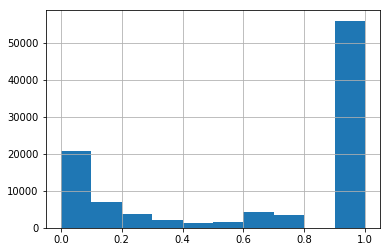

In [92]:
kaggle['sepostulo'].hist()

In [94]:
kaggle[['id', 'sepostulo']].to_csv(RUTA_SUBMITS + 'submit-32.csv', index=False)

,idaviso,idpostulante,num_postulaciones
0,739260,6M9ZQR,0
1,739260,6v1xdL,0
2,739260,ezRKm9,0
3,758580,1Q35ej,0
4,758580,EAN4J6,0
5,758580,8R6pzR,0
6,776420,aZJ2XN,0
7,776420,Nmpo3J,0
8,776420,eVqWar,0
9,820850,6ZBD33,0


In [103]:
test_solo_ceros = pd.read_csv(RUTA_DATOS_PROCESADOS + 'kaggle.csv')
test_solo_ceros.head()

,id,idaviso,idpostulante,cant_vistas,cant_vistas_empresa,cant_vistas_area,cant_postulaciones_empresa,cant_postulaciones_area
0,0,739260,6M9ZQR,0,0,4,0,0
1,1,739260,6v1xdL,0,0,0,0,5
2,2,739260,ezRKm9,0,0,1,0,0
3,3,758580,1Q35ej,0,0,0,0,0
4,4,758580,EAN4J6,0,0,0,0,0


In [104]:
test_solo_ceros['num_postulaciones'] = test2['num_postulaciones']

In [106]:
test_solo_ceros = test_solo_ceros[test_solo_ceros['num_postulaciones'] == 0]

In [107]:
test = pd.merge(test_solo_ceros, postulantes, on='idpostulante', how='left')
test = pd.merge(test, avisos_detalle, on='idaviso', how='left')
test = test.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])
test['sexo'] = test['sexo'].fillna(0)
test['prom_sexo'] = test['prom_sexo'].fillna(0)
test['edad'] = test['edad'].fillna(30)
test['prom_edad'] = test['prom_edad'].fillna(30)
test['nivel_educativo'] = test['nivel_educativo'].fillna(2)
test[test['cant_postulaciones_area'].isna()] = 0
test[test['cant_postulaciones_empresa'].isna()] = 0
test[test['cant_vistas'].isna()] = 0
test[test['cant_vistas_area'].isna()] = 0
test[test['cant_vistas_empresa'].isna()] = 0
test[test['prom_nivel_educativo'].isna()] = 0

In [110]:
test = test.drop(axis=1, labels=['num_postulaciones'])

In [111]:
ret = rdf.predict_proba(test)

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


In [113]:
test['sepostulo'] = pd.DataFrame(ret)[1]

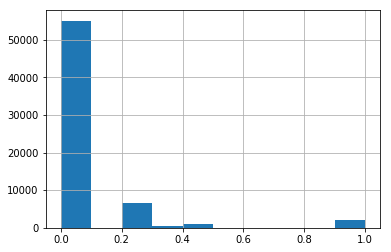

In [114]:
test['sepostulo'].hist()

In [117]:
s = pd.read_csv(RUTA_SET_KAGGLE)

In [120]:
test_solo_ceros['sepostulo'] = test['sepostulo']

In [124]:
m = pd.merge(s, test_solo_ceros, on=['idpostulante', 'idaviso'], how='outer')

In [131]:
m = m.drop(axis=1, labels=['id_x', 'id_y'])

In [132]:
m = pd.merge(m, s[['id', 'idaviso', 'idpostulante']], on=['idpostulante', 'idaviso'], how='inner')

In [125]:
m['sepostulo'] = m['sepostulo'].fillna(1)

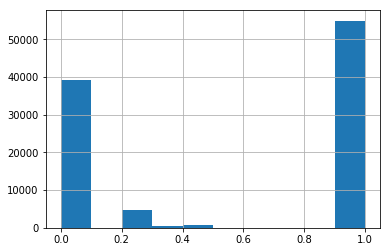

In [126]:
m['sepostulo'].hist()

In [135]:
m[['id', 'sepostulo']].to_csv(RUTA_SUBMITS + 'submit-34.csv', index=False)

In [134]:
m[['id', 'sepostulo']]

,id,sepostulo
0,0,0.0
1,1,0.3
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0
